In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Load dataset
parkinsons_dataset = pd.read_csv(r"D:\python AC\PredictionOutbreaks\datasets\parkinsons.csv")

In [3]:
# Explore dataset
print("Dataset Shape:", parkinsons_dataset.shape)
print("\nDataset Description:\n", parkinsons_dataset.describe())
print("\nClass Distribution:\n", parkinsons_dataset['status'].value_counts())


Dataset Shape: (195, 24)

Dataset Description:
        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920  

In [4]:
# ✅ Select only numeric columns before computing mean
numeric_columns = parkinsons_dataset.select_dtypes(include=['number']).columns
means = parkinsons_dataset[numeric_columns].groupby(parkinsons_dataset['status']).mean()

In [5]:
#LINE CHART VISUALIZATION HERE
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'HNR', 'RPDE']


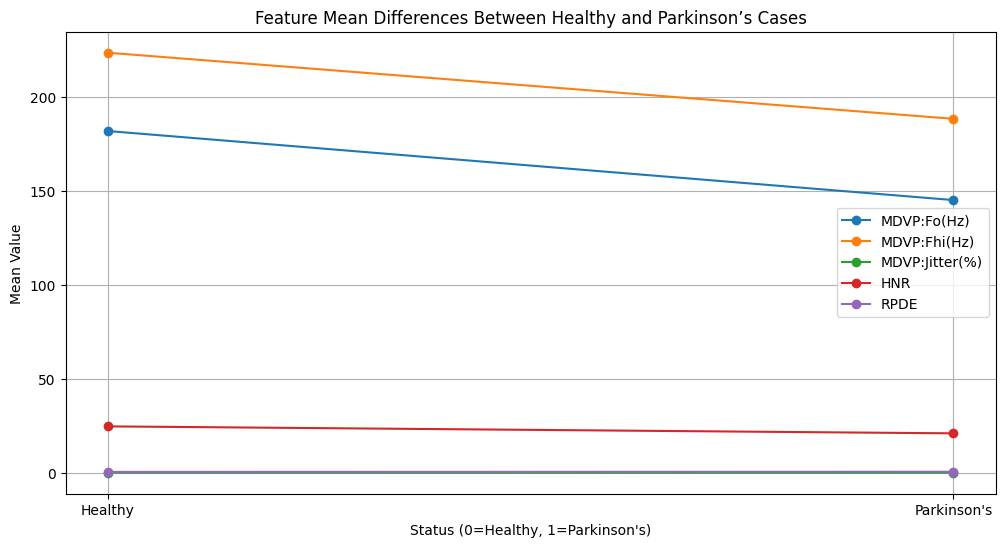

In [6]:
# Create a line plot for selected features
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot([0, 1], means[feature], marker='o', label=feature)  # X-axis: Status (0=Healthy, 1=Parkinson's)

plt.title("Feature Mean Differences Between Healthy and Parkinson’s Cases")
plt.xlabel("Status (0=Healthy, 1=Parkinson's)")
plt.ylabel("Mean Value")
plt.xticks([0, 1], labels=["Healthy", "Parkinson's"])
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='status', ylabel='MDVP:Jitter(%)'>

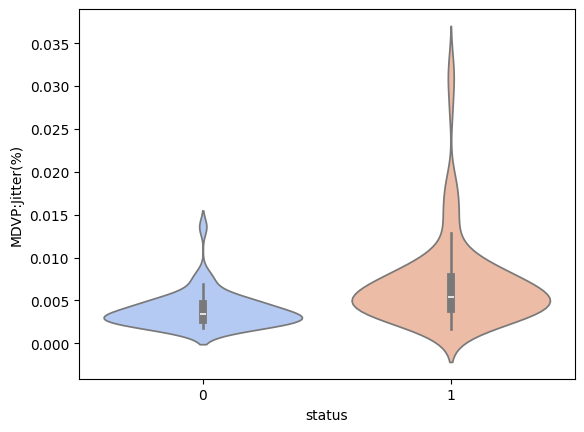

In [7]:
sns.violinplot(
    x=parkinsons_dataset['status'], 
    y=parkinsons_dataset['MDVP:Jitter(%)'], 
    hue=parkinsons_dataset['status'],  # Explicitly assign hue
    palette="coolwarm", 
    legend=False  # Disable legend if not needed
)


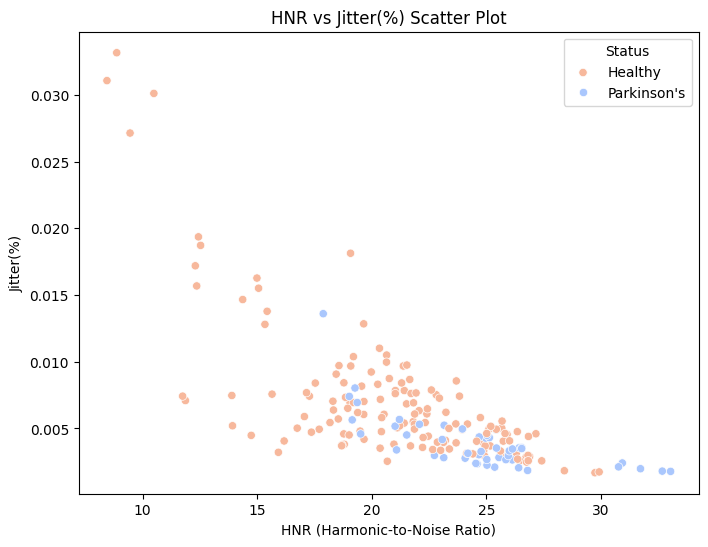

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=parkinsons_dataset['HNR'], y=parkinsons_dataset['MDVP:Jitter(%)'], hue=parkinsons_dataset['status'], palette="coolwarm")
plt.title("HNR vs Jitter(%) Scatter Plot")
plt.xlabel("HNR (Harmonic-to-Noise Ratio)")
plt.ylabel("Jitter(%)")
plt.legend(title="Status", labels=["Healthy", "Parkinson's"])
plt.show()


<Axes: xlabel='status', ylabel='RPDE'>

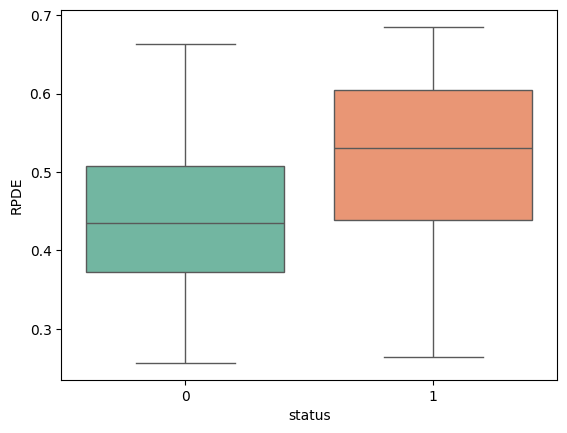

In [9]:
sns.boxplot(
    x=parkinsons_dataset['status'], 
    y=parkinsons_dataset['RPDE'], 
    hue=parkinsons_dataset['status'],  # Explicitly assign hue
    palette="Set2", 
    legend=False  # Disable legend if not needed
)


In [10]:
# Prepare features and target (excluding 'name' or any non-numeric columns)
X = parkinsons_dataset.drop(columns=['status', 'name'], errors='ignore')  # Ignores 'name' if present
y = parkinsons_dataset['status']


In [11]:
# Display first 5 rows of features
print("\nFeature Sample:\n", X.head())



Feature Sample:
    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE     

In [12]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)


SVC(kernel='linear')

In [14]:
# Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("\nModel Accuracy:", accuracy)



Model Accuracy: 0.8717948717948718


In [15]:
# Save trained model
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

print("\nModel saved successfully as 'parkinsons_model.sav'")


Model saved successfully as 'parkinsons_model.sav'
